# PyTorch with Lightning

## Importing libraries

In [ ]:
!pip install pytorch-lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 51.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import pytorch_lightning as L
from torch.utils.data import TensorDataset,DataLoader

import matplotlib.pyplot as plt
import seaborn as sns

## Creating Network

In [ ]:
class BasicLightning(L.LightningModule):
    def __init__(self):
        super().__init__()

        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85),requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0),requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(-16.),requires_grad=False)

    def forward(self,x):

        self.layer_1 = F.relu(self.w00*x+self.b00) * self.w01
        self.layer_2 = F.relu(self.w10*x+self.b10) * self.w11

        output = F.relu(self.final_bias + self.layer_1 + self.layer_2)

        return output


## Creating Dataset

In [ ]:
input_doses = torch.linspace(start=0,end=1,steps=11)
input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [ ]:
model = BasicLightning()
output_values = model(input_doses)

Text(0, 0.5, 'Doses')

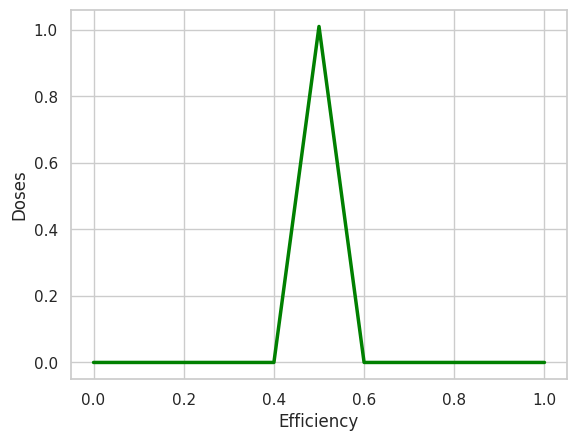

In [ ]:
sns.set(style="whitegrid")
sns.lineplot(x=input_doses,y=output_values,color="green",linewidth=2.5)
plt.xlabel("Efficiency")
plt.ylabel("Doses")

## Training the Network

In [ ]:
class BasicLightningTrain(L.LightningModule):
    def __init__(self):
        super().__init__()

        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85),requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0),requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(0.0),requires_grad=True) # only changing this shit.

        self.learning_rate = 0.01

    def forward(self,x):

        self.layer_1 = F.relu(self.w00*x+self.b00) * self.w01
        self.layer_2 = F.relu(self.w10*x+self.b10) * self.w11

        output = F.relu(self.final_bias + self.layer_1 + self.layer_2)

        return output

    def configure_optimizers(self):
        return SGD(self.parameters(),lr=self.learning_rate)

    def training_step(self,batch,batch_idx):
        input_i,label_i = batch
        output_i = self.forward(input_i)
        loss = (output_i - label_i)**2

        return loss


In [ ]:
inputs = torch.tensor([0.,0.5,1.])
labels = torch.tensor([0.,1.,0.])

dataset = TensorDataset(inputs,labels)
dataloader = DataLoader(dataset)

In [ ]:
from pytorch_lightning.tuner import Tuner
model = BasicLightningTrain()

trainer = L.Trainer(max_epochs=34)
tuner = Tuner(trainer)

lr_find_results = tuner.lr_find(model,train_dataloaders=dataloader,min_lr=0.001,max_lr=1.0,early_stop_threshold=None)

new_lr = lr_find_results.suggestion()

print(f"lr_find() suggests {new_lr:.5f} for the learning rate.")

INFO:pytorch_lightning.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.002137962089502232
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_e57faac1-d313-4e76-9152-c7567956c758.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint at /content/.lr_find_e57faac1-d313-4e76-9152-c7567956c758.ckpt


lr_find() suggests 0.00214 for the learning rate.


In [ ]:
model.learning_rate = new_lr

In [ ]:
trainer.fit(model,train_dataloaders=dataloader)

INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type | Params | Mode
---------------------------------------------
  | other params | n/a  | 7      | n/a 
---------------------------------------------
1         Trainable params
6         Non-trainable params
7         Total params
0.000     Total estimated model params size (MB)
0         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=34` reached.


In [ ]:
print(model.final_bias)

Parameter containing:
tensor(-2.1706, requires_grad=True)


Text(0.5, 0, 'Dose')

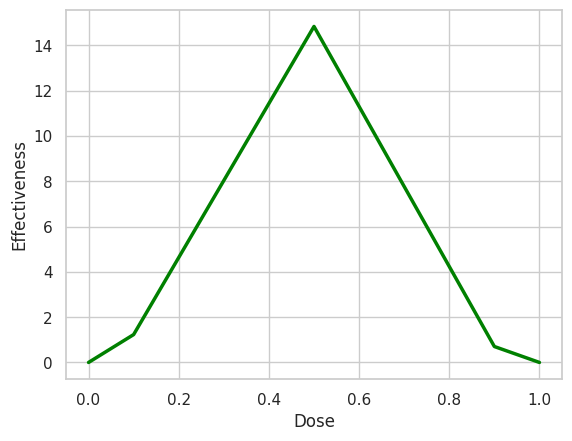

In [ ]:
output_values = model(input_doses)
sns.set(style="whitegrid")
sns.lineplot(x=input_doses,y=output_values.detach(),color="green",linewidth=2.5)

plt.ylabel("Effectiveness")
plt.xlabel("Dose")